# Multi-layer Forward-feed NN 

## 1. Plottting decision boundaries
## 2. The Problem of Overfitting: Training vs. Validation Sets
## 3. The Regularization Parameter: alpha


In [1]:
%matplotlib inline
# All imports

from __future__ import print_function, division
from random import choice
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display



# from sklearn.neural_network import MLPClassifier

np.set_printoptions(formatter={'float': '{:.5f}'.format})


In [2]:
import sklearn
print(sklearn.__version__)

# ------------> Note: new imports <------------------
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cross_validation import train_test_split


0.18.dev0


/Users/labuser/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Let's take a look at the sklearn neural network documentation:

http://scikit-learn.org/dev/modules/neural_networks_supervised.html

## Summary: 

- ## Activation: {‘logistic’, ‘tanh’, ‘relu’}; for classifcation: default ‘relu’

     Activation function for the hidden layer.

     ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

     ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

     ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
     
     From experience: 
     
     'relu' is effective for classification, but NOT for regression -- why?  
     Whereas 'tanh' is much better for regression.

- ## Important Attributes (suppose we're using a classifier):

    clf.coefs\_
    
    clf.intercepts\_
    
    clf.loss\_
    
    clf.out\_activation\_
    
    clf.score
    
    clf.decision_function
   
- ## Difference between a classifier and a regressor:

    The regressror does NOT have an output activation function, or 
    
    The output activation funciton for the regressor is the identity
     


## Breakout

## Now, our favorite problem the XOR

In [3]:
X_train = np.array([[0, 0],
              [0, 1],          
              [1, 0],
              [1, 1]])

y_train = np.array([0, 1, 1, 0])

# using 'tanh' as activation function
# default value: learning_rate_init = 0.001 way too slow,
# so change it to 0.2
clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-10, hidden_layer_sizes=(2, 2), activation = 'tanh', \
                    random_state=5, max_iter=10000, learning_rate_init = 0.1)

# try sgd
# clf = MLPClassifier(algorithm='sgd', alpha=1e-5, hidden_layer_sizes=(2, 2), activation='tanh', \
#                     random_state=5, max_iter=10000, learning_rate_init = 0.1)

clf.fit(X_train, y_train)
print(X_train)
clf.predict(X_train)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


array([0, 1, 1, 0])

## Breakout Exercise:

## Modify the function visual_NN_boundaries from Week8-2 to generate 2000 random points in the square of x between (0, 1) and y between (0, 1) to visualize the decision boundaries, where x and y are Cartesian coordinates.



## Breakout Exercise:

## Instead of using random pairs of (x, y) coordinates, now generate a grid of points for x between (0, 1) and for y between (0, 1).  Find the predictions (that is, the the output, z) by using the trained classifier for these points.  Try a (11, 11) grid first.

## Then use plt.contour to demarcate the boundaries.

## Resource: 

http://matplotlib.org/examples/pylab_examples/contour_demo.html

## Breakout

- ## Simulate 50 data points according to 

   ##  $$y = sin(1.1kx), $$
   
   ##  $$k=2,$$
   
   ##  where x is between 0 and 3.5

   ## with Gaussian noise, with a $\sigma$ of 0.25


- ## Split the data into training and validation (testing)sets.  Instantiate a sklearn NN regressor to fit the training set and report the score.  Apply the trained regressor on the testing set and report a score.  First Use a (1, 3, 1) network, and then use a (1, 21, 1) network.

- ## Write a program that slowly increases the number of neurons (from 0 to 11) and dynamically updates two plots each time the number of neurons is increased:
    ## 1. The fit vs. the data  On this plot, also state the number of neurons, the average score for the training set and the validation set.

    ## 2. The average scores for the training and validation (testing) sets vs. the number of neurons in the hidden layer.  You should first try iterate 50 times for each fixed number of neurons.  Randomize the following quantities for each iteration:
    
  
   


Score_train:  0.952464029606
Score_test:  0.858857351132


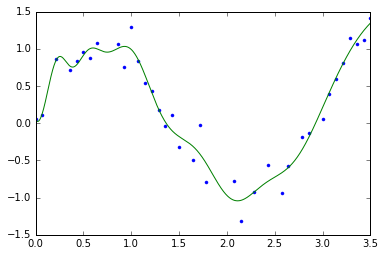

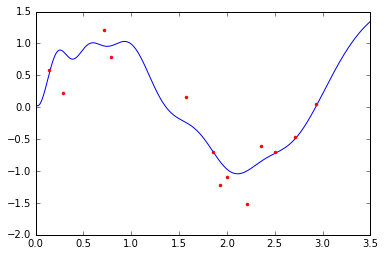

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split

N = 50
sig = .25
xmin = 0.
xmax = 3.5
neurons = 81
k = 2.

x = np.linspace(xmin, xmax, N)
y = np.sin(1.1*k*x) + np.random.randn(x.shape[0])*sig

X = np.atleast_2d(x).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

reg = MLPRegressor(algorithm='l-bfgs', hidden_layer_sizes=(neurons,), activation='tanh',\
                    random_state=1, max_iter=10000000, learning_rate_init = 0.001, alpha=1e-16)

reg.fit(X_train, y_train)
print("Score_train: ", reg.score(X_train, y_train))
print("Score_test: ", reg.score(X_test, y_test))

x_plot = np.linspace(xmin, xmax, 1000)
X_plot = np.atleast_2d(x_plot).T

plt.plot(X_train, y_train, '.')

y_predict = reg.predict(X_plot)
plt.plot(X_plot, y_predict)

plt.figure()
plt.plot(X_plot, y_predict)
plt.plot(X_test, y_test, 'r.')

plt.show()


# End of Week9-2